In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

In [103]:
dataset = datasets.load_diabetes(return_X_y=True,as_frame=True)

In [104]:
df1 = pd.DataFrame(dataset[0])

In [105]:
df2 = pd.DataFrame(dataset[1])

In [106]:
df2.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [107]:
df = pd.concat([df1,df2],axis=1)

In [108]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [109]:
diabetes_X = df['age']

In [110]:
diabetes_y= df['target']

In [111]:
type(diabetes_X)

pandas.core.series.Series

In [112]:
X_train,X_test,y_train,y_test  = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=42)

In [113]:
X_train = np.reshape(X_train.values,(-1,1))

In [114]:
X_train.shape

(353, 1)

In [115]:
X_test = np.reshape(X_test.values,(-1,1))

In [116]:
X_test.shape

(89, 1)

In [117]:
y_train = np.reshape(y_train.values,(-1,1))

In [118]:
y_train.shape

(353, 1)

In [119]:
y_test = np.reshape(y_test.values,(-1,1))

In [120]:
y_test.shape

(89, 1)

In [121]:
model = LinearRegression()

In [122]:
model.fit(X_train,y_train)

LinearRegression()

In [123]:
model.coef_,model.intercept_

(array([[331.072172]]), array([153.25920153]))

In [124]:
y_predict = model.predict(X_test)

In [125]:
rmse = sqrt(mean_squared_error(y_test,y_predict))

In [126]:
mae = mean_absolute_error(y_test,y_predict)

In [129]:
r2_score = r2_score(y_test,y_predict)

In [130]:
print(f'Root Mean Square Error',rmse)
print(f'Mean Absolut Error',mae)

print(f'R2 coefficient',r2_score)


Root Mean Square Error 72.48608125865272
Mean Absolut Error 63.11782369042888
R2 coefficient 0.008289640305771506


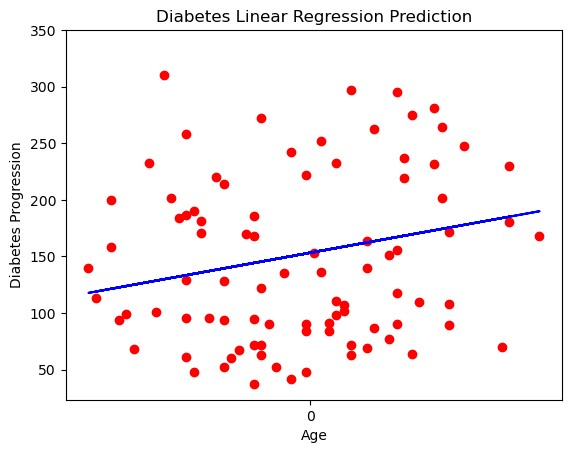

In [149]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_predict,color='blue')
plt.xticks(np.arange(0,0.1))
plt.yticks(np.arange(50,400,step=50))
plt.title('Diabetes Linear Regression Prediction')
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')
plt.show()